<a href="https://colab.research.google.com/github/FrodoBaggins87/Machine_Learning/blob/main/MultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make Toy Dataset


tensor([[-7.7683, -2.9459],
        [-2.7813, -3.3533],
        [ 3.8169,  8.8942],
        [-2.1853, -5.6408],
        [-0.2256, -0.7143]]) tensor([0, 1, 3, 1, 4])


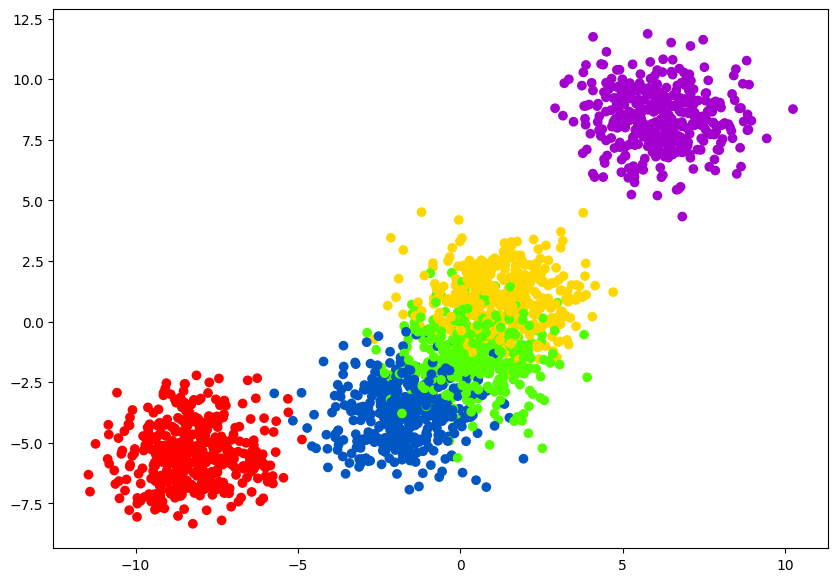

In [21]:
#import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
RANDOM_SEED=57
#make dataset
#x_blob contains coordinates of the point, y_blob contains which blob the point belongs to
x_blob, y_blob= make_blobs(n_samples=2000,#number of points
                           n_features=2,#number of dimensions of the points basically
                           centers=5, #number of blobs
                           cluster_std=1.2, #to add noise in the cluster points
                           random_state=RANDOM_SEED)#random seed
#turning into tensors
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)#LongTensor makes tensor of dtype int64
print(x_blob[:5],y_blob[:5])

#split into training and test dataset
x_blob_train, x_blob_test, y_blob_train, y_blob_test=train_test_split(x_blob, y_blob, test_size=0.25, random_state=RANDOM_SEED)

#PLOTTING
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob, cmap=plt.cm.prism)


Making Device Agnostic Code

In [22]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Build Model

In [23]:
from torch import nn
class BlobModel_0(nn.Module):
  def __init__(self, input_features, output_features):
    super().__init__()
    self.network=nn.Sequential(
        nn.Linear(in_features=input_features, out_features=5),
        nn.ReLU(),
        nn.Linear(in_features=5, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=15),
        nn.ReLU(),
        nn.Linear(in_features=15, out_features=output_features)
    )
  def forward(self,x):
    return self.network(x)
#creating and instance of BlobModel and put in device
model_0=BlobModel_0(input_features=2, output_features=5).to(device)#input_features tell number of number of features, out features tell number of classes(number of blobs)
model_0


BlobModel_0(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=15, bias=True)
    (5): ReLU()
    (6): Linear(in_features=15, out_features=5, bias=True)
  )
)

Creating Loss Function and Optimizer

In [24]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_0.parameters(),
                       lr=0.05)

In [25]:
#looking at logits produced by model
model_0(x_blob_train.to(device))[:5]

tensor([[-0.0697,  0.1149,  0.0388, -0.2214, -0.1644],
        [-0.0511,  0.0325,  0.0081, -0.1202, -0.0909],
        [-0.0236,  0.0160, -0.0180, -0.1198, -0.1175],
        [-0.0342, -0.0468, -0.0265, -0.1192, -0.0365],
        [-0.1589,  0.1717,  0.0866, -0.2759, -0.2460]],
       grad_fn=<SliceBackward0>)

In [26]:
model_0(x_blob_train.to(device))[0].shape #should be equal to number of blobs/classes in data

torch.Size([5])

Make prediction with model using SoftMax activation function

In [27]:
y_logits=model_0(x_blob_test.to(device))
#using softmax activation function
y_pred_prob=torch.softmax(y_logits,dim=1)#dim chooses which dimension is softmax applied across, read its documentation
print(y_logits[:5])
print(y_pred_prob[:5])


tensor([[-0.0434,  0.0086, -0.0142, -0.1222, -0.1236],
        [-0.1073,  0.1651,  0.0628, -0.2674, -0.2174],
        [-0.1338,  0.1580,  0.0876, -0.2355, -0.2064],
        [-0.0254, -0.0407, -0.0293, -0.1163, -0.0415],
        [-0.0287, -0.0435, -0.0295, -0.1163, -0.0377]],
       grad_fn=<SliceBackward0>)
tensor([[0.2028, 0.2137, 0.2088, 0.1875, 0.1872],
        [0.1906, 0.2503, 0.2260, 0.1624, 0.1707],
        [0.1845, 0.2470, 0.2302, 0.1667, 0.1716],
        [0.2050, 0.2019, 0.2042, 0.1872, 0.2017],
        [0.2044, 0.2014, 0.2043, 0.1873, 0.2026]], grad_fn=<SliceBackward0>)


In [28]:
#choosing which class the data point belongs most likely to
print(y_pred_prob[0])#the sum of the probabilities should be 1.0
print(torch.argmax(y_pred_prob[0]))

tensor([0.2028, 0.2137, 0.2088, 0.1875, 0.1872], grad_fn=<SelectBackward0>)
tensor(1)
